In [40]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import scipy.misc as spm

plt.style.use("seaborn")

# Homework 11 - Nonlinear equations

#### Excercise 1

Write **your own** function called `bisection_method` that takes as arguments:
-  a function to find the root of,
-  the guesses $a,b$, and
-  a tolerance limit with a default value of `1E-6`.

The function should return the root and the uncertainty of the root as $|a-b|$.

Use that function to solve find the roots of the equation
$$x^3+4x^2-27x-90=0$$ 

In [41]:
def bisection_method(
    f: callable,
    interval: Tuple[float, float],
    tolerance: float = 1e-6,
    max_iters: int = 10000
) -> Tuple[float, float]:
    """
    Bisection method for finding the root of a function.

    Parameters
    ----------
    f : callable
        Function to find the root of.
    interval : Tuple[float, float]
        Interval in which to search for the root.
    tolerance : float
        Tolerance for the root.

    Returns
    -------
    Tuple[float, float]
        Interval containing the root.
    """
    a, b = interval
    if f(a) * f(b) > 0:
        raise ValueError("Function has no root in the given interval.")

    iterations = 0
    error = abs(b - a)
    while error > tolerance and iterations < max_iters:
        c = (a + b) / 2
        error = abs(b - a)
        if f(c) * f(a) > 0:
            a = c
        else:
            b = c
        iterations += 1
    return c, error

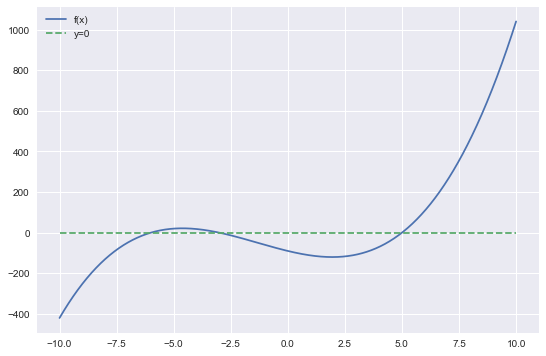

In [42]:
def f(x: float) -> float:
    return x**3 + 4*x**2 - 27*x - 90

x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x, f(x), label="f(x)")
ax.plot(x, np.zeros(len(x)), linestyle="--", label="y=0")
ax.legend()
plt.show()
plt.close()

In [43]:
intervals = [(-10, -5), (-5, 0), (0, 10)]

for interval in intervals:
    print(f"Interval: {interval}")
    bisection = bisection_method(f, interval)
    print(f"Root: {bisection[0]:1.4f}, Error: {bisection[1]:1.4e}")

Interval: (-10, -5)
Root: -6.0000, Error: 5.9605e-07
Interval: (-5, 0)
Root: -3.0000, Error: 5.9605e-07
Interval: (0, 10)
Root: 5.0000, Error: 5.9605e-07


#### Excercise 2

Plank's radiation law says that the intensity of radiation per unit area and per unit wavelength $\lambda$ from a black body at temperature $T$ is 
$$
I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_BT}-1}
$$

By differentiation we can show that the wavelength at which emitted radiation is maximum is the solution to the equation

<div style="font-size: 16pt; color: red"> This is incorrect? </div>

$$
5e^{hc/\lambda k_BT}+\frac{hc}{\lambda k_BT}-5=0
$$

<div style="font-size: 16pt; color: lime"> This is what it should be? </div>

$$
\begin{align*}
\cfrac{hc e^{hc/k_B T \lambda}}{k_BT\lambda(1 - e^{hc/k_BT\lambda})} + 5 &= 0 \\[10pt]

\cfrac{x e^{x}}{(1 - e^{x})} + 5 &= 0 \\[10pt]

x e^{x} + 5(1 - e^{x}) &= 0 \\[10pt]

x e^{x} + 5 - 5e^{x} &= 0 \\[10pt]

(x - 5) e^{x} + 5 &= 0 \\[10pt]

\end{align*}
$$

When you substitute $x=hc/\lambda k_BT$, then the wavelength of maximum  radiation is given by Wein's displacment law
$$
\lambda=\frac{b}{T}
$$
where $b=hc/\lambda k_Bx$.

I don't think  $b$ should have a factor of $1/\lambda$ either....

- Use [`scipy.optimize.bisect`][1] and solve the equation for $x$, then using that value, find the temperature of the sun, whose maximum in intensity is at $\lambda=502$ nm

- Write **your own** Newton's method to solve the equation for $x$, then using that value, find the temperature of the sun, whose maximum in intensity is at $\lambda=502$ nm. (**Bonus 2 points.** Your starting guess should be more than 1.69. Why?)


[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html

In [64]:
from scipy.constants import c, h, k

print(f"{c = }, {h = }, {k = }")

def f(x: float) -> float:
    return (x - 5) * np.exp(x) + 5


c = 299792458.0, h = 6.62607015e-34, k = 1.380649e-23


In [45]:
max_x = spo.bisect(f, 0.0000001, 10)

l = 502e-9

T = h*c / (l * k * max_x)

print(f"The temperature of the sun is approximately {T:1.2f} K if the maximum intensity occurs at a wavelength of {l*1e9:1.0f} nm.")

The temperature of the sun is approximately 5772.45 K if the maximum intensity occurs at a wavelength of 502 nm.


In [46]:
def newton(
    f: callable,
    x0: float,
    fprime: callable = None,
    tolerance: float = 1e-6,
    max_iters: int = 10000
) -> Tuple[float, float]:
    """
    Newton's method for finding the root of a function.

    Parameters
    ----------
    f : callable
        Function to find the root of.
    x0 : float
        Initial guess for the root.
    tolerance : float
        Tolerance for the root.

    Returns
    -------
    Tuple[float, float]
        Interval containing the root.
    """
    
    if fprime is None:
        def fprime(x: float) -> float:
            return spm.derivative(f, x, dx=1e-5)
    
    x = x0
    iterations = 0
    error = abs(f(x))
    while error > tolerance and iterations < max_iters:
        x = x - f(x) / fprime(x)
        error = abs(f(x))
        iterations += 1
    return x, error, iterations

In [47]:
max_x, *info = newton(f=f, x0=4.5)
T = h*c / (l * k * max_x)
print(f"The temperature of the sun is approximately {T:1.2f} K if the maximum intensity occurs at a wavelength of {l*1e9:1.0f} nm.")

The temperature of the sun is approximately 5772.45 K if the maximum intensity occurs at a wavelength of 502 nm.


<font color="blue"><b>Bonus:</b> </blue>

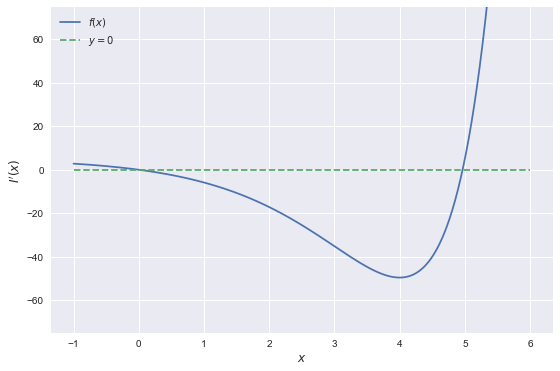

In [60]:
x = np.linspace(-1, 6, 1000)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-75, 75)
ax.plot(x, f(x), label="$f(x)$")
ax.plot(x, np.zeros(len(x)), linestyle="--", label="$y=0$")
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$I^{\prime}(x)$", fontsize=12)
ax.legend()
plt.show()
plt.close()

# Answer to bonus 

The initial guess actually has to be greater than $x_0 = 4$ here, otherwise Newton's method will fall into the local minimum around $x = 4$, or if we supply a guess less than 4, it will will find the other root near $x = 0$

#### Exercise 3

Use Newton's method to take the inverse of $u=\tanh{x}$, that is for a given $u$, calculate $\tanh^{-1}{u}=x$. Clearly this is the root of $f(x)=\tanh(x)-u$ where $u$ is a constant.

-  Include the function $f(x)$ to evaluate
-  Include a function for $f'(x)$ to evaluate
-  The programming problem is how to pass the value of $u$ to these functions?

Python functions can be defined such that they accept a list of arguments in addition to the variable $x$ where they are to be evaluated. For exmaple: 
```python
def f(x, *args):
    u = args
    return numpy.tanh(x)-u
     
# -- This is the value of u we want to take the arctanh of.
# -- args_to_pass wil be passed into both f and fp to help evaluate those funcitons.
# -- It is a 'tuple' type container, a collection which is ordered and unchangeable, different from a list.
args_to_pass=(0.9,) 
scipy.optimize.newton(f,0.0,fprime=fp,args=args_to_pass) 
```

Verify your results with `numpy.arctanh`.

In [49]:
def f(x: float, u: float) -> float:
    return np.tanh(x) - u

def fprime(x: float, u: float) -> float:
    return 1 - np.tanh(x)**2

def inverse_tanh(x: float) -> float:
    args = (x,)
    return spo.newton(f, x0=0, fprime=fprime, args=args)
    
test_values = [0.9, -0.9, 0, 0.1, 0.5, -0.5]

# I did the validation slightly differently than was requested.
for value in test_values:
    inverse = inverse_tanh(value)
    if np.isclose(value, np.tanh(inverse)):
        print(f"Tested np.tanh(inverse_tanh({value})) = {value}: Valid inverse of tanh.")
    else:
        print(f"Tested np.tanh(inverse_tanh({value})) = {value}: Not a valid inverse of tanh.")

print("\n")

# Here is the requested validation
for value in test_values:
    inverse = inverse_tanh(value)
    if np.isclose(inverse, np.arctanh(value)):
        print(f"Tested np.arctanh({value}) = {inverse}: Valid inverse of tanh.")
    else:
        print(f"Tested np.arctanh({value}) = {inverse}: Not a valid inverse of tanh.")

Tested np.tanh(inverse_tanh(0.9)) = 0.9: Valid inverse of tanh.
Tested np.tanh(inverse_tanh(-0.9)) = -0.9: Valid inverse of tanh.
Tested np.tanh(inverse_tanh(0)) = 0: Valid inverse of tanh.
Tested np.tanh(inverse_tanh(0.1)) = 0.1: Valid inverse of tanh.
Tested np.tanh(inverse_tanh(0.5)) = 0.5: Valid inverse of tanh.
Tested np.tanh(inverse_tanh(-0.5)) = -0.5: Valid inverse of tanh.


Tested np.arctanh(0.9) = 1.4722194895832201: Valid inverse of tanh.
Tested np.arctanh(-0.9) = -1.4722194895832201: Valid inverse of tanh.
Tested np.arctanh(0) = 0.0: Valid inverse of tanh.
Tested np.arctanh(0.1) = 0.10033534773107557: Valid inverse of tanh.
Tested np.arctanh(0.5) = 0.5493061443340548: Valid inverse of tanh.
Tested np.arctanh(-0.5) = -0.5493061443340548: Valid inverse of tanh.


#### Excercise 4

The [Lagrangian point][LP] L1 lies on the line between the Earth and Moon, and follows in synchronicity the orbit of the Moon. The point is just at the right spot that the balance of gravity pulling in toward the Earth, and out toward the Moon, combine to provide the exact needed centripetal force to keep a satilite in orbit.

Assuming circular orbits, the L1 point satifies
$$\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega^2r$$
where $G$ is the gravitational constant, $M$ is the mass of the Earth, $m$ the mass of the moon, $\omega$ is the moon's orbital frequency, $R$ is the distance from the Earth to the moon, and $r$ the distace from the center of the Earth to the L1 point.

Use Newton's method to solve for $r$ to at least four significant figures.</font>

Use:
$$
\begin{array}{l}
G &=& 6.674 \times 10^{-11}\textrm{ m$^3$kg$^{-1}$s$^{-2}$} \\
M &=& 5.974 \times 10^{+24}\textrm{ kg} \\
m &=& 7.348 \times 10^{+22}\textrm{ kg} \\
R &=& 3.844 \times 10^{+8}\textrm{ m} \\
\omega &=& 4.236 \times 10^{-7}\textrm{ s$^{-1}$} 
\end{array}
$$

[LP]: https://en.wikipedia.org/wiki/Lagrangian_point

In [50]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 4.236e-7

def f(r: float) -> float:
    return G * M / (r**2) - G * m / ((R - r)**2) - r*w**2

In [51]:
solution = spo.newton(f, R/2, tol=1e-10, maxiter=100)
print(f"L1 Point between the Earth and Moon: {solution:1.4e} meters.")

L1 Point between the Earth and Moon: 3.4570e+08 meters.
